#### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 4
### Due: Monday, Feb 21th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 21th.

---

## Problem 1

Let $\mu$ be a real number. Let $\sigma$ be a strictly positive real number.

Show that for a Gaussian distribution $\mathscr{N}(\mu,\sigma)$, the mode is its mean $\mu$.

Either write your solution as Markdown/Latex below, or paste in a scanned image of your handwritten solution.

### Solution

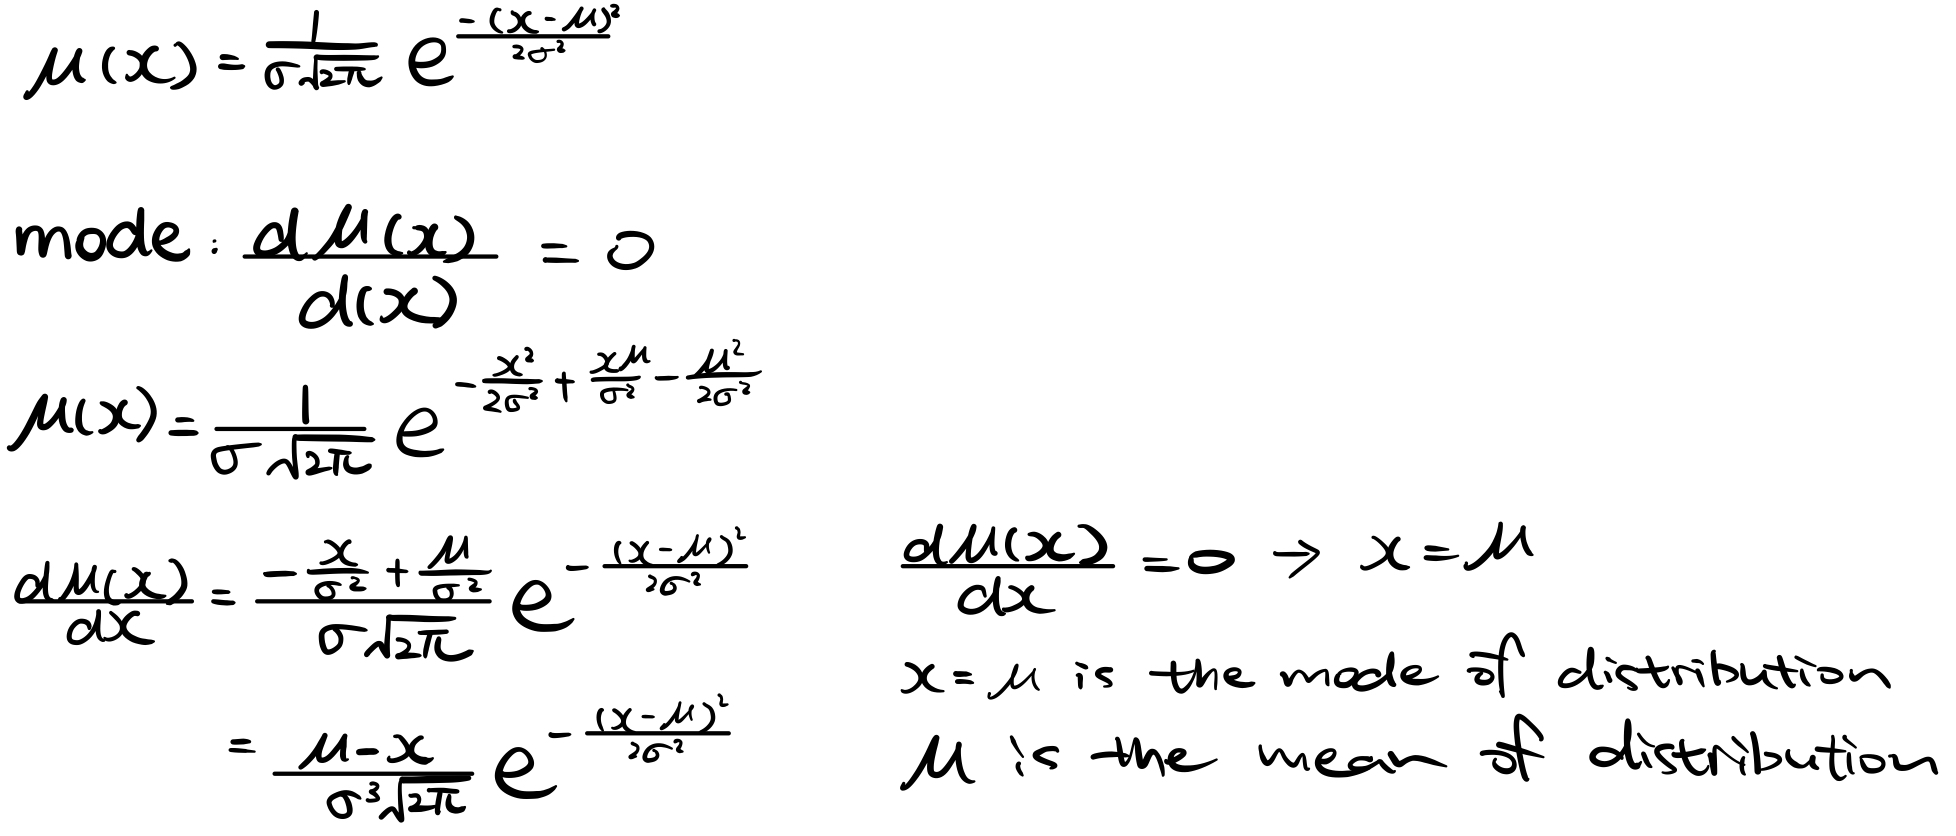

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with the given $\mu$ and $\sigma$. a) Plot the distribution, b) give 10 random draws, along with the pdf at each of the draws. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 130? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?



### Solution



In [2]:
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats
from scipy.stats import norm

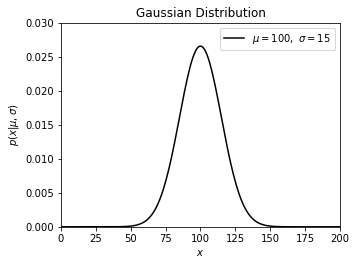

In [30]:
# pdf
distG = scipy.stats.norm(loc = 100, scale = 15)
xgrid = np.linspace(0, 200, 200)
gaussPDF = distG.pdf(xgrid)

mu = 100
sigma = 15

fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

In [8]:
draws = norm.rvs(size = 10)
print(draws)
for i in range(len(draws)):
    pdf = norm.pdf(draws[i])
    print(f"pdf of draw {i+1} is {pdf}")

[-2.46403333  0.07223839  1.05181008  1.20872188  0.86775512  2.03295136
 -0.08448425 -0.33833667  0.62042649  0.02819084]
pdf of draw 1 is 0.019165017435253152
pdf of draw 2 is 0.3979027201015463
pdf of draw 3 is 0.22944526858825018
pdf of draw 4 is 0.19215694456970792
pdf of draw 5 is 0.2737779207478079
pdf of draw 6 is 0.05052009306431361
pdf of draw 7 is 0.39752107497761213
pdf of draw 8 is 0.3767496444014442
pdf of draw 9 is 0.32909689887485366
pdf of draw 10 is 0.3987837875420968


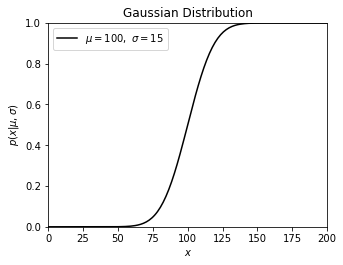

In [14]:
# cdf
distG = scipy.stats.norm(loc = 100, scale = 15)
xgrid = np.linspace(0, 200, 200)
gaussCDF = distG.cdf(xgrid)

mu = 100
sigma = 15

fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

124.67280440427209


(0.0, 200.0)

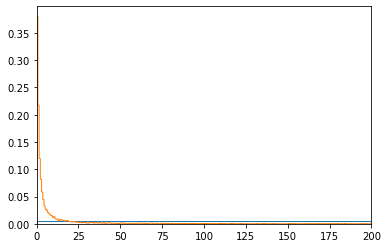

In [173]:
print(norm.ppf(0.95, loc = 100, scale = 15))

from scipy.stats import invgauss
import matplotlib.pyplot as plt

mu = 100

r = invgauss.rvs(mu, size=10000)

from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(r, bins="scott", histtype="step", density=True)
_ = fancyhist(r, bins="freedman", histtype="step",density=True)

plt.xlim(0, 200)

In [167]:
p = distG.cdf(130)
print(f'fraction of people have IQ > 130 is {1-p}')

fraction of people have IQ > 130 is 0.02275013194817921


In [64]:
from scipy.stats import invgauss

p = invgauss.pdf(100, 15)
print(f'IQ corresponds to "one in a million" is {p}')

IQ corresponds to "one in a million" is 0.000339767374304758


In [156]:
# Take inverse of pdf
import math
def inverse_pdf_positive(p, mu, sigma):
    return mu+(-2*(sigma**2)*math.log(sigma*(2*math.pi)**(1/2)*p))**(1/2)

def inverse_pdf_negative(p, mu, sigma):
    return mu-(-2*(sigma**2)*math.log(sigma*(2*math.pi)**(1/2)*p))**(1/2)

print("IQ corresponds to one in a million is", 
      inverse_pdf_positive(10**(-6), 100, 15))

print("Another IQ corresponds to one in a million is", 
      inverse_pdf_negative(10**(-6), 100, 15))

IQ corresponds to one in a million is 167.71140834930128
Another IQ corresponds to one in a million is 32.288591650698734
